# Data Augmentation Notes

## 0. Initial image

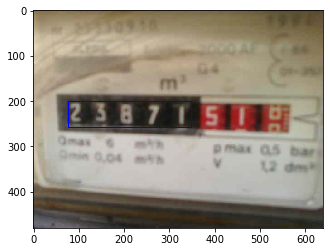

In [8]:
import matplotlib.patches as patches

image  = Image.open("counter-example.jpg")
annotations = [Annotation(0, 0.330469, 0.476042, 0.423438, 0.122917)]
annotation_plot(image, annotations)


## 1. Rotation

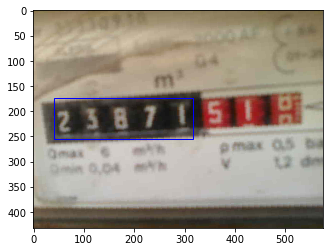

In [9]:
#from IPython.display import Image
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from yolo_lib.data_augmentation.rotation_and_crop import *
from yolo_lib.annotation_plot import *
from yolo_lib.annotation import *

image  = Image.open("counter-example.jpg")
angle =5
rotationCrop = RotationAndCrop(angle)

yolo_box = annotations[0]
newImage,annotations = rotationCrop.apply(image, [yolo_box])

annotation_plot(newImage, annotations)


## 2. Affine transformation

In [17]:
import numpy

def find_coeffs(pa, pb):
    matrix = []
    for p1, p2 in zip(pa, pb):
        matrix.append([p1[0], p1[1], 1, 0, 0, 0, -p2[0]*p1[0], -p2[0]*p1[1]])
        matrix.append([0, 0, 0, p1[0], p1[1], 1, -p2[1]*p1[0], -p2[1]*p1[1]])

    A = numpy.matrix(matrix, dtype=numpy.float)
    B = numpy.array(pb).reshape(8)

    res = numpy.dot(numpy.linalg.inv(A.T * A) * A.T, B)
    return numpy.array(res).reshape(8)

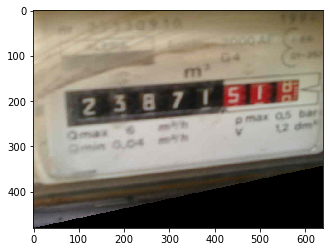

In [19]:
img = Image.open("counter-example.jpg")
persp = -.4
coeffs = find_coeffs(
        [(0, 0), (0, img.height), (img.width, 0), (img.width, img.height)],
        [(0, 0), (0, img.height), (img.width, 0), (img.width, (1-persp)*img.height)])

modified = img.transform((img.width, img.height), Image.PERSPECTIVE, coeffs,Image.BICUBIC)

imgplot = plt.imshow(modified)